# Programming Assignment # 4 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell! 

Student Name and ID:  Sai Rohith Pasala; 1001873156  <-------------------- Only this student will submit the assignment

Student Name and ID:  Sri Naga Venkata Pavan Kalyan Sirigibattula; 1001886149

Student Name and ID:  Rutvik Naga Sai Dondapati; 1001879177


## Rules

1. Work is to be done in a team
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa3.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is not required for this assignment. If you want to document a function or a process, just comment or use markup cell.
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.



## Assignment Details

The purpose of this assignment is to cluster  using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is given as 3 files . 




You need to submit this ipython file after renaming it. 

Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.



In [48]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [49]:
# Import required Python packages here
#Seaborn,numpy,pandas,sklearn,matplotlib only
import numpy as np
#importing Operations required for Data analysis, wrangling and common exploratory
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans
from plotly.subplots import make_subplots
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import plotly.graph_objects as go
!pip install plotly

In [50]:
cluster_df = pd.read_csv('College.csv', skipinitialspace=True, encoding='latin1')


In [51]:
cluster_df = cluster_df.dropna() # dropping data which have with null values

In [52]:
cluster_df.isna().sum()#check for null values

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [53]:
cluster_df #Sample display of dataset before preprocessing

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [54]:
cluster_df.drop(['Apps','Enroll','F.Undergrad'],inplace=True,axis=1)

In [55]:
cluster_df['Private'].value_counts()

Yes    565
No     212
Name: Private, dtype: int64

In [56]:
# map the feature to integer integer value.
cluster_df['Private']=cluster_df['Private'].map({'Yes':1,"No":0})

In [57]:
cluster_df.head()

,Unnamed: 0,Private,Accept,Top10perc,Top25perc,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1,1232,23,52,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,1,1924,16,29,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1,1097,22,50,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,1,349,60,89,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,1,146,16,44,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## Data Preprocessing

In [66]:
# Convert/encode all non numerical values
print("Data preprocessing Initiated...")

print("-----------------------------------------------------------------------")
le = LabelEncoder()
Private = le.fit_transform(cluster_df.Private)
cluster_df["Private"]=Private

cluster_df=cluster_df.drop(cluster_df.columns[[0]],axis=1)
print("DATA Preprocessing COmplete")
#Data preprocess complete
cluster_df.head()#sample display for first 5 rows after preprocessing

Data preprocessing Initiated...
-----------------------------------------------------------------------
DATA Preprocessing COmplete


,Private,Accept,Top10perc,Top25perc,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1232,23,52,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,1924,16,29,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1097,22,50,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,349,60,89,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,146,16,44,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

In [67]:
#########################begin code for Task 1-a
print("Plotting your Data...")
print("-----------------------------------------------------------------------")
Sum_Sq_Err = [] # creating a list to store squared errors
for l in range(1, 11):
    kmeans = KMeans(n_clusters=l).fit(cluster_df)#iterating l(k-value) against S.S.E for 
    Sum_Sq_Err.append(kmeans.inertia_)
import plotly.express as px
#Using Scatterplot
fig = go.Figure(data=go.Scatter(x=list(range(1,11)), y=Sum_Sq_Err, selectedpoints=(2,Sum_Sq_Err[1]),line=dict(color="Green")))
fig.update_layout(title_text='SUM OF SQUARED ERRORS(y-axis)----- VS---- K-VALUE(x-axis)')
fig.show()
#########################begin code for Task 1-a


Plotting your Data...
-----------------------------------------------------------------------


### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [68]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing

### Important!!!
# X_train = cluster_df.sample(frac=0.70, random_state=0)# taking 70 percent data as sample
# X_test = cluster_df.drop(X_train.index)# taking all data from dataframe except the index of the 
# y_train = X_train.pop('Class')#consider the Class as the Target variable and removing it from training data 
# y_test = X_test.pop('Class')#we are removing the class variable as it is the target varibale

X = cluster_df.drop(['Private'], axis=1)
y = cluster_df['Private']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)




###################end code for Task 1-b-1

plotting Initiated..
-----------------------------------------------------------------------


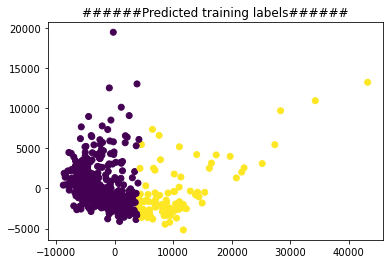

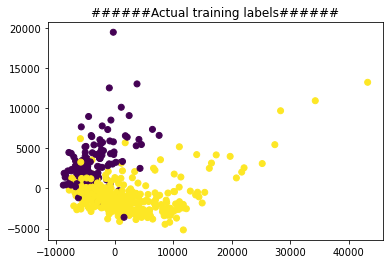

In [69]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels

# Import PCA
from sklearn.decomposition import PCA
# Create the KMeans model
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)
print("plotting Initiated..")
print("-----------------------------------------------------------------------")

# Compute cluster centers and predict cluster index for each sample 
idx=kmeans.predict(X_train)#kmeans prediction of trained data

# Model and fit the data to the PCA model
X_train_pca = PCA(n_components=2).fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]
plt.title("######Predicted training labels######")#plotting the predicted data using idx as index for coloring
plt.scatter(x,y,c=idx)
plt.show()
plt.title("######Actual training labels######")#plotting the predicted data using y_train as index for coloring
plt.scatter(x,y,c=y_train)
plt.show()



###################end code for Task 1-b-2


Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

plotting Initiated..
-----------------------------------------------------------------------


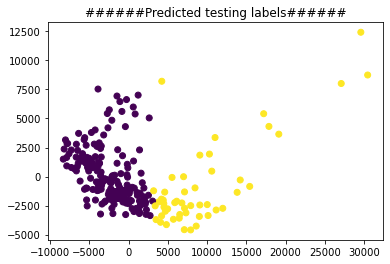

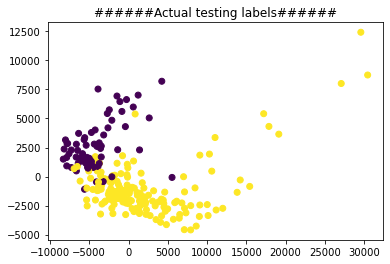

In [70]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels
print("plotting Initiated..")
print("-----------------------------------------------------------------------")
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_test)

# predict cluster index for each sample 
idx1=kmeans.predict(X_test)
# Model and fit the data to the PCA model
X_test_pca = PCA(n_components=2).fit_transform(X_test)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]
plt.title("######Predicted testing labels######")#plotting the predicted data using idx1 as index for coloring
plt.scatter(x,y,c=idx1)
plt.show()
plt.title("######Actual testing labels######")#plotting the predicted data using y_test as index for coloring
plt.scatter(x,y,c=y_test)
plt.show()

###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

In [71]:
###################begin code for Task 1-b-4: Print out a confusion matrix
print("-----------------------------------------------------------------------")
print("Confusion matrix for training data \n",confusion_matrix(y_train,idx))#syntax to print confusion matrix of trained data
print("-----------------------------------------------------------------------")
print("Confusion matrix for training data \n",confusion_matrix(y_test,idx1))#syntax to print confusion matrix of tested data
print("-----------------------------------------------------------------------")

###################end code for Task 1-b-4

-----------------------------------------------------------------------
Confusion matrix for training data 
 [[138   4]
 [311  90]]
-----------------------------------------------------------------------
Confusion matrix for training data 
 [[ 68   2]
 [116  48]]
-----------------------------------------------------------------------


# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [72]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


## Calculate pairwise distance matrix for X_train
pdm_train = X_train
print("Hierarchical Agglomerative Clustering Model Initated...")
print("-----------------------------------------------------------------------")
cosine_distance = pairwise_distances(pdm_train,metric='cosine')#Using Cosine Similarity
euclidean_distance = pairwise_distances(pdm_train,metric='euclidean')#Using Euclidean Distance
manhattan_distance = pairwise_distances(pdm_train,metric='manhattan')#Using Manhattan Distance

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
cos_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(cosine_distance)#complete linkage + cosine
cos_comp_f1 = f1_score(y_train,cos_comp)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
euc_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(euclidean_distance)#complete linkage + euclidean
euc_comp_f1 = f1_score(y_train,euc_comp)


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan

man_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(manhattan_distance)#complete linkage + manhattan
man_comp_f1 = f1_score(y_train,man_comp)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
cos_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(cosine_distance)#average linkage + cosine
cos_avg_f1 = f1_score(y_train,cos_avg)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
euc_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(euclidean_distance)#average linkage + euclidean
euc_avg_f1 = f1_score(y_train,euc_avg)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
man_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(manhattan_distance)#average linkage + manhattan
man_avg_f1 = f1_score(y_train,man_avg)

print("######F1-score for complete linkage + cosine######", cos_comp_f1) #complete linkage + cosine
print("-----------------------------------------------------------------------")
print("######F1-score for complete linkage + euclidean######", euc_comp_f1)#complete linkage + euclidean
print("-----------------------------------------------------------------------")
print("######F1-score for complete linkage + manhattan######", man_comp_f1)#complete linkage + manhattan
print("-----------------------------------------------------------------------")
print("######F1-score for average linkage + cosine######", cos_avg_f1)#average linkage + cosine
print("-----------------------------------------------------------------------")
print("######F1-score for average linkage + euclidean######", euc_avg_f1)#average linkage + euclidean
print("-----------------------------------------------------------------------")
print("######F1-score for average linkage + manhattan######", man_avg_f1)#average linkage + manhattan


###################end code for Task 2-a

Hierarchical Agglomerative Clustering Model Initated...
-----------------------------------------------------------------------
######F1-score for complete linkage + cosine###### 0.8876529477196886
-----------------------------------------------------------------------
######F1-score for complete linkage + euclidean###### 0.04390243902439024
-----------------------------------------------------------------------
######F1-score for complete linkage + manhattan###### 0.04390243902439024
-----------------------------------------------------------------------
######F1-score for average linkage + cosine###### 0.868995633187773
-----------------------------------------------------------------------
######F1-score for average linkage + euclidean###### 0.04390243902439024
-----------------------------------------------------------------------
######F1-score for average linkage + manhattan###### 0.014851485148514849


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

Visualiztion initiated..
-------------------------------------------------------------------------------------------------


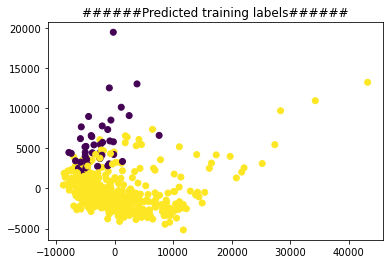

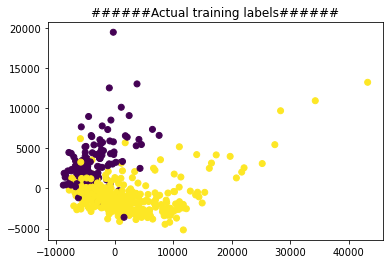

In [73]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels
print("Visualiztion initiated..")
print("-------------------------------------------------------------------------------------------------")
models = {'cos_comp':cos_comp_f1,'euc_comp':euc_comp_f1,'man_comp':man_comp_f1,'cos_avg':cos_avg_f1,'euc_avg':euc_avg_f1,'man_avg':man_avg_f1}
best_model_val = max(models,key=models.get)

if best_model_val == 'cos_comp':#complete linkage + cosine
    best_model = cos_comp

elif best_model_val == 'euc_comp':#complete linkage + euclidean
    best_model = euc_comp

elif best_model_val == 'man_comp':#complete linkage + manhattan
    best_model = man_comp

elif best_model_val == 'cos_avg':#average linkage + cosine
    best_model = cos_avg

elif best_model_val == 'euc_avg':#average linkage + euclidean
    best_model = euc_avg

elif best_model_val == 'man_avg':#average linkage + manhattan
    best_model = man_avg

else:
    best_model = None

X_train_pca = PCA(n_components=2).fit_transform(X_train)

# Visualize the predicted training labels versus actual training labels. 
x = X_train_pca[:,0]
y = X_train_pca[:,1]
plt.scatter(x,y,c=best_model)
plt.title("######Predicted training labels######")
plt.show()
plt.scatter(x,y,c=y_train)
plt.title("######Actual training labels######")
plt.show()

###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

Visualization for both models Initated...
-------------------------------------------------------------------------------------------------


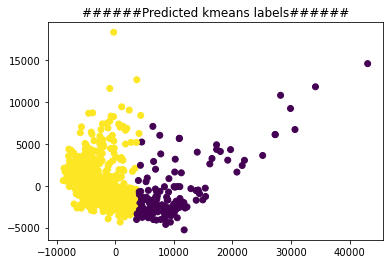

-------------------------------------------------------------------------------------------------


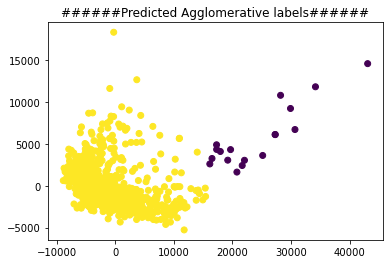

-------------------------------------------------------------------------------------------------


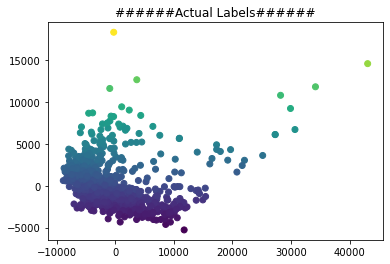

In [82]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
X = cluster_df[cluster_df.columns[0:]]
y = cluster_df[cluster_df.columns[0]]

kmeans_data = KMeans(n_clusters=2,random_state=0)
kmeans_data_fit = kmeans_data.fit_predict(X)

### Agglomerative Clustering
# Calculate pairwise distance matrix for X
cosine_distance = pairwise_distances(X,metric='cosine')#Using Cosine Similarity
euclidean_distance = pairwise_distances(X,metric='euclidean')#Using Euclidean Distance
manhattan_distance = pairwise_distances(X,metric='manhattan')#Using Manhattan Distance

# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
print("Visualization for both models Initated...")
print("-------------------------------------------------------------------------------------------------")
cos_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(cosine_distance)#complete linkage + cosine
cos_comp_f1 = f1_score(y,cos_comp)
euc_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(euclidean_distance)#complete linkage + euclidean
euc_comp_f1 = f1_score(y,euc_comp)
man_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(manhattan_distance)#complete linkage + manhattan
man_comp_f1 = f1_score(y,man_comp)
cos_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(cosine_distance)#average linkage + cosine
cos_avg_f1 = f1_score(y,cos_avg)
euc_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(euclidean_distance)#average linkage + euclidean
euc_avg_f1 = f1_score(y,euc_avg)
man_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(manhattan_distance)#average linkage + manhattan
man_avg_f1 = f1_score(y,man_avg)
models = {'cos_comp':cos_comp_f1,'euc_comp':euc_comp_f1,'man_comp':man_comp_f1,'cos_avg':cos_avg_f1,'euc_avg':euc_avg_f1,'man_avg':man_avg_f1}
best_model_val = max(models,key=models.get)
if best_model_val == 'cos_comp': #complete linkage + cosine
    best_model = cos_comp
elif best_model_val == 'euc_comp':#complete linkage + euclidean
    best_model = euc_comp
elif best_model_val == 'man_comp':#complete linkage + manhattan
    best_model = man_comp
elif best_model_val == 'cos_avg':#average linkage + cosine
    best_model = cos_avg   
elif best_model_val == 'euc_avg':#average linkage + euclidean
    best_model = euc_avg
elif best_model_val == 'man_avg':#average linkage + manhattan
    best_model = man_avg
else:
    best_model = None

### Visualize Clusters
#  Model and fit the data to the PCA model
X_pca = PCA(n_components=2).fit_transform(X)
x = X_pca[:,0]
y = X_pca[:,1]

# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 
plt.scatter(x,y,c=kmeans_data_fit)
plt.title("######Predicted kmeans labels######")#print kmeans as Title
plt.show()
print("-------------------------------------------------------------------------------------------------")
plt.scatter(x,y,c=best_model)#comparing/visualising all models from best_model conditional
plt.title("######Predicted Agglomerative labels######")
plt.show()#plot Agglomerative labels
print("-------------------------------------------------------------------------------------------------")
plt.title("######Actual Labels######")
plt.scatter(x,y,c=y)#plot actual labels 
plt.show()

###################end code for Task 3-a

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

In [84]:
###################begin code for Task 3-b
X = cluster_df[cluster_df.columns[0:]]
y = cluster_df[cluster_df.columns[0]]
print("Comparision for both models Initated...")
print("-------------------------------------------------------------------------------------------------")
print("Confusion matrix\n")
kmeans_conf = confusion_matrix(y,kmeans_data_fit)
agglo_conf = confusion_matrix(y,best_model)
print("-------------------------------------------------------------------------------------------------")
print("Kmeans:")
print(kmeans_conf)
print("--------------------------------")
print("Agglomerative:")
print(agglo_conf)
print("-------------------------------------------------------------------------------------------------")
print("\nPrecision\n")
kmeans_prec = precision_score(y,kmeans_data_fit)
agglo_prec = precision_score(y,best_model)
print("Kmeans:")
print(kmeans_prec)

print("Agglomerative:")
print(agglo_prec)
print("-------------------------------------------------------------------------------------------------")
print("\nRecall\n")
kmeans_recall = recall_score(y,kmeans_data_fit)
agglo_recall = recall_score(y,best_model)
print("Kmeans:")
print(kmeans_recall)

print("Agglomerative:")
print(agglo_recall)
print("-------------------------------------------------------------------------------------------------")
print("\nF1 Score\n")
kmeans_score = f1_score(y,kmeans_data_fit)
agglo_score = f1_score(y,best_model)
print("Kmeans:")
print(kmeans_score)

print("Agglomerative:")
print(agglo_score)
print("-------------------------------------------------------------------------------------------------")
print("Accuracy of kmeans:",metrics.accuracy_score(y,kmeans_data_fit))
print("Accuracy of agglomerative :",metrics.accuracy_score(y,best_model))




###################end code for Task 3-b

Comparision for both models Initated...
-------------------------------------------------------------------------------------------------
Confusion matrix

-------------------------------------------------------------------------------------------------
Kmeans:
[[  5 207]
 [139 426]]
--------------------------------
Agglomerative:
[[  0 212]
 [ 18 547]]
-------------------------------------------------------------------------------------------------

Precision

Kmeans:
0.6729857819905213
Agglomerative:
0.7206851119894598
-------------------------------------------------------------------------------------------------

Recall

Kmeans:
0.7539823008849558
Agglomerative:
0.968141592920354
-------------------------------------------------------------------------------------------------

F1 Score

Kmeans:
0.7111853088480801
Agglomerative:
0.8262839879154079
-------------------------------------------------------------------------------------------------
Accuracy of kmeans: 0.5546975546975547

## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[45 points] Task 1:</b>  

    [15 points] Task 1-a: Determine “k” value from the elbow method

    [30 points] Task 1-b: Visualization for K-Means Clustering

        [05 points] Task 1-b-1: Split the dataset 
    
        [10 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [10 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [05 points] Task 1-b-4: Print out a confusion matrix
    


<b>[50 points] Task 2:</b>  

    [35 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [15 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering



<b>[20 points] Task 3 (BONUS):</b> 

    Task 3-a: 10 points

    Task 3-b: 10 points